In [240]:
import math
import numpy as np
from matplotlib import pyplot as plt

In [241]:
l = 1.0
g = 9.81

In [242]:
def pendulum_dynamics(x): 
    theta = x[0]
    dot_theta = x[1]
    ddot_theta = -(g/l) * math.sin(theta)
    return np.array([dot_theta, ddot_theta])
    

In [243]:
def jac_pendulum_dynamic(x):
    l = 1.0
    g = 9.81
    return np.array([[0.0, 1.0],[-g/l * math.cos(x[0]), 0.0]])

In [244]:
jac_pendulum_dynamic([0.1, 0.0])

array([[ 0.        ,  1.        ],
       [-9.76099086,  0.        ]])

In [245]:
def backward_euler_fixed_point_step(func, x0, h):
    xn = x0
    e = [np.linalg.norm(func(xn) - xn)]
    while e[-1] > 1.0e-8:
        xn = x0 + h * func(xn)
        e.append(np.linalg.norm(x0 + h * func(xn) - xn))
    return xn, e

In [246]:
def newton_jacobian(x, h):
    # x_{k+1} = x_k + h * f(x_{k + 1})
    # f(x) = x_0 + h * f_continues(x) - x
    # f'(x) = h * f'_continuous(x) - I
    return h * jac_pendulum_dynamic(x) - np.identity(len(x))

In [247]:
def backward_euler_step_newton(func, dfunc, x0, h):
    xn = x0
    fx = x0 + h * func(xn) - xn
    e = [np.linalg.norm(fx)]
    while e[-1] > 1.0e-8:
        partial_fx = dfunc(xn, h)
        dx = -np.dot(np.linalg.inv(partial_fx) ,fx)
        xn = xn + dx
        fx = x0 + h * func(xn) - xn
        e.append(np.linalg.norm(fx))
    return xn, e

In [248]:
xn, e = backward_euler_step_newton(pendulum_dynamics, newton_jacobian, [0.1, 0], 0.1)
print(xn)
print(e)

[ 0.09107763 -0.08922368]
[0.09793658173053843, 3.7830087232931797e-06, 5.2874553670659e-15]


In [249]:
x0 = [0.1, 0.0]
backward_euler_fixed_point_step(pendulum_dynamics, x0, 0.1)

(array([ 0.09107764, -0.08922369]),
 [0.9844579239897678,
  0.009793658173053846,
  0.009564124766684667,
  0.0009564124766684723,
  0.0009343853483241293,
  9.343853483241571e-05,
  9.128296581455142e-05,
  9.128296581450979e-06,
  8.917746787032166e-06,
  8.917746786990532e-07,
  8.712050176828967e-07,
  8.712050177106523e-08,
  8.511098474606182e-08,
  8.511098478769519e-09])

In [250]:
def backward_euler_fixpoint_iterations(dynamic, x0, tf, h):
    t_hist = np.arange(0.0, tf, h)
    x_hist = np.zeros((len(t_hist), 2))
    x_hist[0] = x0
    for i in range(len(t_hist) - 1):
        x, e = backward_euler_fixed_point_step(dynamic, x_hist[i], h)
        x_hist[i + 1] = x
    return x_hist, t_hist    

In [251]:
def backward_euler_newton_iteration(dynamic, x0, tf, h):
    t_hist = np.arange(0.0, tf, h)
    x_hist = np.zeros((len(t_hist), 2))
    x_hist[0] = x0
    for i in range(len(t_hist) - 1):
        x, e = backward_euler_step_newton(dynamic, newton_jacobian, x_hist[i], h)
        x_hist[i + 1] = x
    return x_hist, t_hist

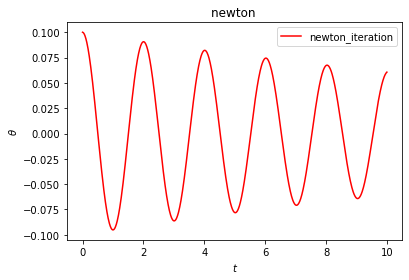

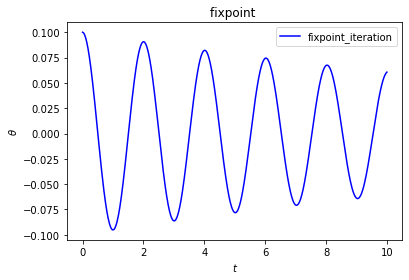

<Figure size 432x288 with 0 Axes>

In [252]:
x0 = [0.1, 0.0]
x_hist, t_hist = backward_euler_fixpoint_iterations(pendulum_dynamics, x0, 10.0, 0.01)
x_hist1, t_hist1 = backward_euler_newton_iteration(pendulum_dynamics,x0, 10.0, 0.01)


# 创建一个新的图形
plt.figure(1)
# 绘制第一组曲线
plt.plot(t_hist, x_hist[:, 0], label='fixpoint_iteration', color='blue')
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.title('fixpoint ')
plt.legend()

# 绘制第二组曲线
plt.figure(2)
plt.plot(t_hist1, x_hist1[:, 0], label='newton_iteration', color='red')
# 添加标签和标题
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.title('newton ')
# 添加图例
plt.legend()

# 显示图像
plt.figure(1)
plt.show()
plt.figure(2)
plt.show()